# Subsetting and sorting

In [1]:
set.seed(13435)
X <- data.frame("var1"=sample(1:5), var2=sample(6:10), var3=sample(11:15))
X

,var1,var2,var3
1,2,8,15
2,3,7,12
3,5,6,14
4,1,10,11
5,4,9,13


In [2]:
X <- X[sample(1:5), ]
X$var2[c(1, 3)] <- NA
X

,var1,var2,var3
1,2,NA,15
4,1,10,11
2,3,NA,12
3,5,6,14
5,4,9,13


In [3]:
X[, 1]

[1] 2 1 3 5 4

In [4]:
X[1:2, "var2"]

[1] NA 10

In [5]:
X[(X$var1 <= 3 & X$var3 > 11) ,]

,var1,var2,var3
1,2,NA,15
2,3,NA,12


### Sorting

In [6]:
sort(X$var1)

[1] 1 2 3 4 5

In [7]:
sort(X$var2, na.last = TRUE)

[1]  6  9 10 NA NA

### Order

In [8]:
X[order(X$var1), ] # By one variable

,var1,var2,var3
4,1,10,11
1,2,NA,15
2,3,NA,12
5,4,9,13
3,5,6,14


In [9]:
# Ordering by two variables. If the variable 1 had more similar values,
# we would have seen an effect
X[order(X$var1, X$var3) ,] 

,var1,var2,var3
4,1,10,11
1,2,NA,15
2,3,NA,12
5,4,9,13
3,5,6,14


# plyr package

In [10]:
library(plyr)

In [11]:
arrange(X, var1) # Sort by var 1

,var1,var2,var3
1,1,10,11
2,2,NA,15
3,3,NA,12
4,4,9,13
5,5,6,14


In [12]:
arrange(X, desc(var1))

,var1,var2,var3
1,5,6,14
2,4,9,13
3,3,NA,12
4,2,NA,15
5,1,10,11


## Adding rows and columns

In [13]:
X$var4 <- rnorm(5)
X

,var1,var2,var3,var4
1,2.000000,NA,15.000000,0.187596
4,1.000000,10.000000,11.000000,1.786976
2,3.0000000,NA,12.0000000,0.4966936
3,5.000000,6.000000,14.000000,0.063183
5,4.0000000,9.0000000,13.0000000,-0.5361329


In [14]:
Y <- cbind(X, rnorm(5)) # Adds to right side of X
Y

,var1,var2,var3,var4,rnorm(5)
1,2.0000000,NA,15.0000000,0.1875960,0.6257849
4,1.000000,10.000000,11.000000,1.786976,-2.450837
2,3.00000000,NA,12.00000000,0.49669358,0.08909424
3,5.0000000,6.0000000,14.0000000,0.0631830,0.4783857
5,4.0000000,9.0000000,13.0000000,-0.5361329,1.0005334


In [15]:
Y <- cbind(rnorm(5), X) # Adds to left side of X
Y

,rnorm(5),var1,var2,var3,var4
1,0.5439561,2.0000000,NA,15.0000000,0.1875960
4,0.3304796,1.0000000,10.0000000,11.0000000,1.7869764
2,-0.9710917,3.0000000,NA,12.0000000,0.4966936
3,-0.9446847,5.0000000,6.0000000,14.0000000,0.0631830
5,-0.2967423,4.0000000,9.0000000,13.0000000,-0.5361329


## Summarizing data

In [16]:
library(datasets) # Now you can get the iris dataset

In [17]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [18]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [19]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [20]:
quantile(iris$Petal.Length)

0%  25%  50%  75% 100% 
1.00 1.60 4.35 5.10 6.90

In [21]:
quantile(iris$Petal.Length, probs=c(0.5, 0.75)) # Specify the quantiles

50%  75% 
4.35 5.10

In [22]:
table(iris$Species) # Give you the counts


    setosa versicolor  virginica 
        50         50         50 

In [23]:
table(iris$Petal.Width, iris$Species) # Create two dimensions

     
      setosa versicolor virginica
  0.1      5          0         0
  0.2     29          0         0
  0.3      7          0         0
  0.4      7          0         0
  0.5      1          0         0
  0.6      1          0         0
  1        0          7         0
  1.1      0          3         0
  1.2      0          5         0
  1.3      0         13         0
  1.4      0          7         1
  1.5      0         10         2
  1.6      0          3         1
  1.7      0          1         1
  1.8      0          1        11
  1.9      0          0         5
  2        0          0         6
  2.1      0          0         6
  2.2      0          0         3
  2.3      0          0         8
  2.4      0          0         3
  2.5      0          0         3

### Missing values

In [24]:
sum(is.na(iris))

[1] 0

In [25]:
any(is.na(iris))

[1] FALSE

In [26]:
all(iris$Petal.Length >= 0) # Check that all are greater or equal 0

[1] TRUE

### Values with specific characteristics

In [27]:
table(iris$Petal.Width %in% c(0.2, 0.3))


FALSE  TRUE 
  114    36 

In [28]:
iris[iris$Petal.Width %in% c(0.3) ,]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
7,4.6,3.4,1.4,0.3,setosa
18,5.1,3.5,1.4,0.3,setosa
19,5.7,3.8,1.7,0.3,setosa
20,5.1,3.8,1.5,0.3,setosa
41,5,3.5,1.3,0.3,setosa
42,4.5,2.3,1.3,0.3,setosa
46,4.8,3,1.4,0.3,setosa


# Download data from the web

In [29]:
# Create data folder
if(!file.exists("./data")) dir.create("./data")
        
fileUrl <- "https://data.baltimorecity.gov/api/views/k5ry-ef3g/rows.csv?accessType=DOWNLOAD"
download.file(fileUrl, destfile = "./data/restaurants.csv")

In [30]:
restData <- read.csv("./data/restaurants.csv")
head(restData)

,name,zipCode,neighborhood,councilDistrict,policeDistrict,Location.1
1,410,21206,Frankford,2,NORTHEASTERN,"4509 BELAIR ROAD Baltimore, MD"
2,1919,21231,Fells Point,1,SOUTHEASTERN,"1919 FLEET ST Baltimore, MD"
3,SAUTE,21224,Canton,1,SOUTHEASTERN,"2844 HUDSON ST Baltimore, MD"
4,#1 CHINESE KITCHEN,21211,Hampden,14,NORTHERN,"3998 ROLAND AVE Baltimore, MD"
5,#1 chinese restaurant,21223,Millhill,9,SOUTHWESTERN,"2481 frederick ave Baltimore, MD"
6,19TH HOLE,21218,Clifton Park,14,NORTHEASTERN,"2722 HARFORD RD Baltimore, MD"


# Creating sequences

In [31]:
seq(1, 10, by=2)

[1] 1 3 5 7 9

In [32]:
seq(1, 10, length=3)

[1]  1.0  5.5 10.0

In [33]:
x <- c(1, 3, 8, 25, 100)
seq(along=x)

[1] 1 2 3 4 5

# Factor variables

In [34]:
restData$zcf <- factor(restData$zipCode)
print(restData$zcf[1:10]) # Prints also the number of levels
#str(restData)

 [1] 21206 21231 21224 21211 21223 21218 21205 21211 21205 21231
32 Levels: -21226 21201 21202 21205 21206 21207 21208 21209 21210 ... 21287


In [35]:
yesno <- sample(c("yes", "no"), size=10, replace=TRUE)
yesnofac <- factor(yesno, levels=c("yes", "no")) # Treats the lowest alphabet. value as 1 by default

print(yesnofac)

 [1] no  no  yes no  yes yes no  yes yes yes
Levels: yes no


In [36]:
relevel(yesnofac, ref="yes")

[1] no  no  yes no  yes yes no  yes yes yes
Levels: yes no

In [37]:
as.numeric(yesnofac)

[1] 2 2 1 2 1 1 2 1 1 1

# Reshaping

In [38]:
library(reshape2)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.00,6.00,160.00,110.00,3.90,2.62,16.46,0.00,1.00,4.00,4.00
Mazda RX4 Wag,21.000,6.000,160.000,110.000,3.900,2.875,17.020,0.000,1.000,4.000,4.000
Datsun 710,22.80,4.00,108.00,93.00,3.85,2.32,18.61,1.00,1.00,4.00,1.00
Hornet 4 Drive,21.400,6.000,258.000,110.000,3.080,3.215,19.440,1.000,0.000,3.000,1.000
Hornet Sportabout,18.70,8.00,360.00,175.00,3.15,3.44,17.02,0.00,0.00,3.00,2.00
Valiant,18.10,6.00,225.00,105.00,2.76,3.46,20.22,1.00,0.00,3.00,1.00


In [39]:
mtcars$carname <- rownames(mtcars) # Create a new column
carMelt <- melt(mtcars, id=c("carname", "gear", "cyl"), measure.vars=c("mpg", "hp"))

head(carMelt, n=3)

,carname,gear,cyl,variable,value
1,Mazda RX4,4,6,mpg,21
2,Mazda RX4 Wag,4,6,mpg,21
3,Datsun 710,4,4,mpg,22.8


In [40]:
tail(carMelt, n=3) # Only hp values at the bottom

,carname,gear,cyl,variable,value
62,Ferrari Dino,5,6,hp,175
63,Maserati Bora,5,8,hp,335
64,Volvo 142E,4,4,hp,109


## Casting dataframes

In [41]:
dcast(carMelt, cyl ~ variable) # By def. caulc. the number of

Aggregation function missing: defaulting to length


,cyl,mpg,hp
1,4,11,11
2,6,7,7
3,8,14,14


In [42]:
dcast(carMelt, cyl ~ variable, mean)

,cyl,mpg,hp
1,4.00000,26.66364,82.63636
2,6.00000,19.74286,122.28571
3,8.0000,15.1000,209.2143


## Averaging values

In [43]:
head(InsectSprays)

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A


In [44]:
print(tapply(InsectSprays$count, InsectSprays$spray, sum))

  A   B   C   D   E   F 
174 184  25  59  42 200 


## Another way (maybe more intuitive) - split

In [45]:
spIns <- split(InsectSprays$count, InsectSprays$spray)
spIns # List for each spray

$A
 [1] 10  7 20 14 14 12 10 23 17 20 14 13

$B
 [1] 11 17 21 11 16 14 17 17 19 21  7 13

$C
 [1] 0 1 7 2 3 1 2 1 3 0 1 4

$D
 [1]  3  5 12  6  4  3  5  5  5  5  2  4

$E
 [1] 3 5 3 5 3 6 1 1 3 2 6 4

$F
 [1] 11  9 15 22 15 16 13 10 26 26 24 13

In [46]:
print(sapply(spIns, sum))

  A   B   C   D   E   F 
174 184  25  59  42 200 


# dplyr : package for data frames

In [47]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [48]:
names(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [49]:
head(select(iris, Sepal.Length:Petal.Length)) # Select to and from

,Sepal.Length,Sepal.Width,Petal.Length
1,5.1,3.5,1.4
2,4.9,3.0,1.4
3,4.7,3.2,1.3
4,4.6,3.1,1.5
5,5.0,3.6,1.4
6,5.4,3.9,1.7


In [50]:
head(select(iris, -(Sepal.Length:Petal.Length))) # All but these two using minus(-)

,Petal.Width,Species
1,0.2,setosa
2,0.2,setosa
3,0.2,setosa
4,0.2,setosa
5,0.2,setosa
6,0.4,setosa


In [51]:
filter(iris, Petal.Width > 0.2) # Only with values above threshold

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.4,3.9,1.7,0.4,setosa
2,4.6,3.4,1.4,0.3,setosa
3,5.7,4.4,1.5,0.4,setosa
4,5.4,3.9,1.3,0.4,setosa
5,5.1,3.5,1.4,0.3,setosa
6,5.7,3.8,1.7,0.3,setosa
7,5.1,3.8,1.5,0.3,setosa
8,5.1,3.7,1.5,0.4,setosa
9,5.1,3.3,1.7,0.5,setosa
10,5,3.4,1.6,0.4,setosa


### Introduction to dplyr

From: https://cran.rstudio.com/web/packages/dplyr/vignettes/introduction.html

To explore the basic data manipulation verbs of dplyr, we’ll start with the built in nycflights13 data frame. This dataset contains all 336776 flights that departed from New York City in 2013. The data comes from the US Bureau of Transportation Statistics, and is documented in ?nycflights13

In [58]:
library(nycflights13)

In [59]:
dim(flights)

[1] 336776     19

In [64]:
head(flights)

ERROR: Error in vapply(df, class, FUN.VALUE = character(1L)): values must be length 1,
 but FUN(X[[19]]) result is length 2


Source: local data frame [6 x 19]

   year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
  (int) (int) (int)    (int)          (int)     (dbl)    (int)          (int)
1  2013     1     1      517            515         2      830            819
2  2013     1     1      533            529         4      850            830
3  2013     1     1      542            540         2      923            850
4  2013     1     1      544            545        -1     1004           1022
5  2013     1     1      554            600        -6      812            837
6  2013     1     1      554            558        -4      740            728
Variables not shown: arr_delay (dbl), carrier (chr), flight (int), tailnum
  (chr), origin (chr), dest (chr), air_time (dbl), distance (dbl), hour (dbl),
  minute (dbl), time_hour (time)

### Single table verbs

Dplyr aims to provide a function for each basic verb of data manipulation:

- filter() (and slice())
- arrange()
- select() (and rename())
- distinct()
- mutate() (and transmute())
- summarise()
- sample_n() (and sample_frac())

### Filter rows with filter()

filter() allows you to select a subset of rows in a data frame. The first argument is the name of the data frame. The second and subsequent arguments are the expressions that filter the data frame:

For example, we can select all flights on January 1st with:

In [67]:
print(head(filter(flights, month == 1, day == 1)))

Source: local data frame [6 x 19]

   year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
  (int) (int) (int)    (int)          (int)     (dbl)    (int)          (int)
1  2013     1     1      517            515         2      830            819
2  2013     1     1      533            529         4      850            830
3  2013     1     1      542            540         2      923            850
4  2013     1     1      544            545        -1     1004           1022
5  2013     1     1      554            600        -6      812            837
6  2013     1     1      554            558        -4      740            728
Variables not shown: arr_delay (dbl), carrier (chr), flight (int), tailnum
  (chr), origin (chr), dest (chr), air_time (dbl), distance (dbl), hour (dbl),
  minute (dbl), time_hour (time)


This is equivalent to the more verbose code in base R:

```r
    flights[flights$month == 1 & flights$$day == 1, ]
```

In [76]:
print(filter(flights, month == 2 | month == 3))

Source: local data frame [53,785 x 19]

    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   (int) (int) (int)    (int)          (int)     (dbl)    (int)          (int)
1   2013     2     1      456            500        -4      652            648
2   2013     2     1      520            525        -5      816            820
3   2013     2     1      527            530        -3      837            829
4   2013     2     1      532            540        -8     1007           1017
5   2013     2     1      540            540         0      859            850
6   2013     2     1      552            600        -8      714            715
7   2013     2     1      552            600        -8      919            910
8   2013     2     1      552            600        -8      655            709
9   2013     2     1      553            600        -7      833            815
10  2013     2     1      553            600        -7      821            825
..   ...   .

To select rows by position, use slice():

In [77]:
print(slice(flights, 1:10))

Source: local data frame [10 x 19]

    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   (int) (int) (int)    (int)          (int)     (dbl)    (int)          (int)
1   2013     1     1      517            515         2      830            819
2   2013     1     1      533            529         4      850            830
3   2013     1     1      542            540         2      923            850
4   2013     1     1      544            545        -1     1004           1022
5   2013     1     1      554            600        -6      812            837
6   2013     1     1      554            558        -4      740            728
7   2013     1     1      555            600        -5      913            854
8   2013     1     1      557            600        -3      709            723
9   2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
Variables not sh

### Arrange rows with arrange()

arrange() works similarly to filter() except that instead of filtering or selecting rows, it reorders them. It takes a data frame, and a set of column names (or more complicated expressions) to order by. If you provide more than one column name, each additional column will be used to break ties in the values of preceding columns:

In [80]:
head(arrange(flights, year, month, day), 10)

ERROR: Error in vapply(df, class, FUN.VALUE = character(1L)): values must be length 1,
 but FUN(X[[19]]) result is length 2


Source: local data frame [10 x 19]

    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   (int) (int) (int)    (int)          (int)     (dbl)    (int)          (int)
1   2013     1     1      517            515         2      830            819
2   2013     1     1      533            529         4      850            830
3   2013     1     1      542            540         2      923            850
4   2013     1     1      544            545        -1     1004           1022
5   2013     1     1      554            600        -6      812            837
6   2013     1     1      554            558        -4      740            728
7   2013     1     1      555            600        -5      913            854
8   2013     1     1      557            600        -3      709            723
9   2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
Variables not sh

### Select columns with select()

Often you work with large datasets with many columns but only a few are actually of interest to you. select() allows you to rapidly zoom in on a useful subset using operations that usually only work on numeric variable positions:

In [82]:
head(select(flights, year, month, day))

,year,month,day
1,2013,1,1
2,2013,1,1
3,2013,1,1
4,2013,1,1
5,2013,1,1
6,2013,1,1


In [83]:
# This is similar to above
head(select(flights, year:day))

,year,month,day
1,2013,1,1
2,2013,1,1
3,2013,1,1
4,2013,1,1
5,2013,1,1
6,2013,1,1


In [84]:
# Select all except
head(select(flights, -(year:day)))

ERROR: Error in vapply(df, class, FUN.VALUE = character(1L)): values must be length 1,
 but FUN(X[[16]]) result is length 2


Source: local data frame [6 x 16]

  dep_time sched_dep_time dep_delay arr_time sched_arr_time arr_delay carrier
     (int)          (int)     (dbl)    (int)          (int)     (dbl)   (chr)
1      517            515         2      830            819        11      UA
2      533            529         4      850            830        20      UA
3      542            540         2      923            850        33      AA
4      544            545        -1     1004           1022       -18      B6
5      554            600        -6      812            837       -25      DL
6      554            558        -4      740            728        12      UA
Variables not shown: flight (int), tailnum (chr), origin (chr), dest (chr),
  air_time (dbl), distance (dbl), hour (dbl), minute (dbl), time_hour (time)

In [87]:
head(select(flights, tail_num = tailnum)) # Select only the tailnum column now

,tail_num
1,N14228
2,N24211
3,N619AA
4,N804JB
5,N668DN
6,N39463


In [90]:
# But because select() drops all the variables not explicitly mentioned, 
# it’s not that useful. Instead, use rename():
head(rename(flights, tail_num = tailnum)) # Be aware that 

ERROR: Error in vapply(df, class, FUN.VALUE = character(1L)): values must be length 1,
 but FUN(X[[19]]) result is length 2


Source: local data frame [6 x 19]

   year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
  (int) (int) (int)    (int)          (int)     (dbl)    (int)          (int)
1  2013     1     1      517            515         2      830            819
2  2013     1     1      533            529         4      850            830
3  2013     1     1      542            540         2      923            850
4  2013     1     1      544            545        -1     1004           1022
5  2013     1     1      554            600        -6      812            837
6  2013     1     1      554            558        -4      740            728
Variables not shown: arr_delay (dbl), carrier (chr), flight (int), tail_num
  (chr), origin (chr), dest (chr), air_time (dbl), distance (dbl), hour (dbl),
  minute (dbl), time_hour (time)

In [93]:
dim(distinct(flights, tailnum))

[1] 4044   19

In [95]:
length(unique(flights$tailnum))

[1] 4044

### Add new columns with mutate()

Besides selecting sets of existing columns, it’s often useful to add new columns that are functions of existing columns. This is the job of mutate():

In [96]:
head(mutate(flights, gain = arr_delay - dep_delay, speed = distance / air_time * 60))

ERROR: Error in vapply(df, class, FUN.VALUE = character(1L)): values must be length 1,
 but FUN(X[[19]]) result is length 2


  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013     1   1      517            515         2      830            819
2 2013     1   1      533            529         4      850            830
3 2013     1   1      542            540         2      923            850
4 2013     1   1      544            545        -1     1004           1022
5 2013     1   1      554            600        -6      812            837
6 2013     1   1      554            558        -4      740            728
  arr_delay carrier ... tailnum origin dest air_time distance hour minute
1        11      UA ...  N14228    EWR  IAH      227     1400    5     15
2        20      UA ...  N24211    LGA  IAH      227     1416    5     29
3        33      AA ...  N619AA    JFK  MIA      160     1089    5     40
4       -18      B6 ...  N804JB    JFK  BQN      183     1576    5     45
5       -25      DL ...  N668DN    LGA  ATL      116      762    6      0
6        12      UA ...  N39463

dplyr::mutate() works the same way as plyr::mutate() and similarly to base::transform(). The key difference between mutate() and transform() is that mutate allows you to refer to columns that you’ve just created:

In [101]:
# gain will not be found
transform(flights,
  gain = arr_delay - dep_delay,
  gain_per_hour = gain / (air_time / 60)
)

ERROR: Error in eval(expr, envir, enclos): object 'gain' not found


If you only want to keep the new variables, use transmute():

In [98]:
head(transmute(flights, gain = arr_delay - dep_delay,  gain_per_hour = gain / (air_time / 60)))

,gain,gain_per_hour
1,9.000000,2.378855
2,16.000000,4.229075
3,31.000,11.625
4,-17.00000,-5.57377
5,-19.000000,-9.827586
6,16.0,6.4


### Summarise values with summarise()

The last verb is summarise(). It collapses a data frame to a single row (this is exactly equivalent to plyr::summarise()):

In [102]:
summarise(flights, delay=mean(dep_delay, na.rm=TRUE))

,delay
1,12.63907


### Grouped operations

In [107]:
by_tailnum <- group_by(flights, tailnum)

delay <- summarise(by_tailnum,
                   count = n(),
                   dist = mean(distance, na.rm=TRUE),
                   delay = mean(arr_delay, na.rm=TRUE))
head(delay)

,tailnum,count,dist,delay
1,D942DN,4,854.5,31.5
2,N0EGMQ,371,676.188679245283,9.98295454545454
3,N10156,153,757.947712418301,12.7172413793103
4,N102UW,48,535.875,2.9375
5,N103US,46,535.195652173913,-6.93478260869565
6,N104UW,47,535.255319148936,1.80434782608696


In [112]:
library(ggplot2)



Warning message:
: Removed 7 rows containing non-finite values (stat_smooth).Warning message:
: Removed 7 rows containing missing values (geom_point).

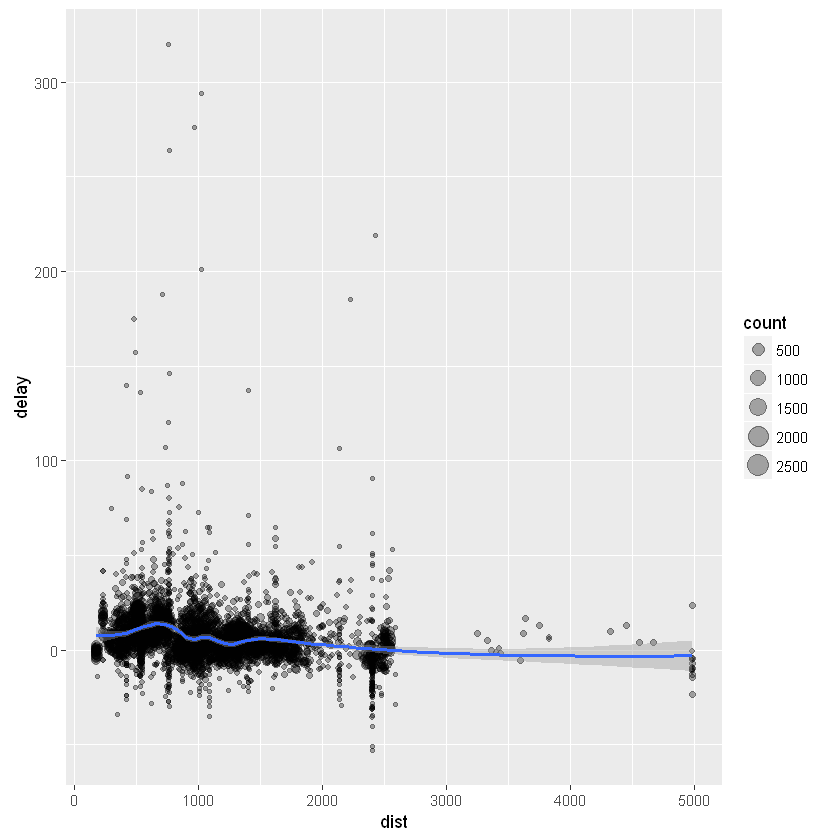

In [120]:
ggplot(delay, aes(dist, delay)) +
  geom_point(aes(size = count), alpha = 1/3) +
  geom_smooth() #+
  #scale_size_area()

# Merging data

## Peer review data

In [123]:
if(!dir.exists("./data")) {
    dir.create("./data")
} else print("./data exists")

[1] "./data exists"


In [125]:
fileUrl1 <- "https://dl.dropboxusercontent.com/u/7710864/data/reviews-apr29.csv"
fileUrl2 <- "https://dl.dropboxusercontent.com/u/7710864/data/solutions-apr29.csv"

# Download files
download.file(fileUrl1, destfile="./data/reviews.csv")
download.file(fileUrl2, destfile="./data/solutions.csv")

In [126]:
reviews <- read.csv("./data/reviews.csv")
solutions <- read.csv("./data/solutions.csv")

In [128]:
head(reviews, 2)

,id,solution_id,reviewer_id,start,stop,time_left,accept
1,1,3,27,1304095698,1304095758,1754,1
2,2,4,22,1304095188,1304095206,2306,1


In [133]:
head(solutions, 4)

,id,problem_id,subject_id,start,stop,time_left,answer
1,1,156,29,1304095119,1304095169,2343,B
2,2,269,25,1304095119,1304095183,2329,C
3,3,34,22,1304095127,1304095146,2366,C
4,4,19,23,1304095127,1304095150,2362,D


In [130]:
names(reviews)

[1] "id"          "solution_id" "reviewer_id" "start"       "stop"       
[6] "time_left"   "accept"

In [131]:
names(solutions)

[1] "id"         "problem_id" "subject_id" "start"      "stop"      
[6] "time_left"  "answer"

We can use the solution_id and id in solutions df to merge.

In [132]:
mergedData <- merge(reviews, solutions, by.x="solution_id", by.y="id", all=TRUE)
head(mergedData)

,solution_id,id,reviewer_id,start.x,stop.x,time_left.x,accept,problem_id,subject_id,start.y,stop.y,time_left.y,answer
1,1,4,26,1304095267,1304095423,2089,1,156,29,1304095119,1304095169,2343,B
2,2,6,29,1304095471,1304095513,1999,1,269,25,1304095119,1304095183,2329,C
3,3,1,27,1304095698,1304095758,1754,1,34,22,1304095127,1304095146,2366,C
4,4,2,22,1304095188,1304095206,2306,1,19,23,1304095127,1304095150,2362,D
5,5,3,28,1304095276,1304095320,2192,1,605,26,1304095127,1304095167,2345,A
6,6,16,22,1304095303,1304095471,2041,1,384,27,1304095131,1304095270,2242,C


### Default merging
By default, a merge will be performed on the common names(df)

In [134]:
intersect(names(solutions), names(reviews))

[1] "id"        "start"     "stop"      "time_left"

In [135]:
mergedData2 <- merge(reviews, solutions, all=TRUE)
head(mergedData2)

,id,start,stop,time_left,solution_id,reviewer_id,accept,problem_id,subject_id,answer
1,1,1304095119,1304095169,2343,NA,NA,NA,156,29,B
2,1,1304095698,1304095758,1754,3,27,1,NA,NA,NA
3,2,1304095119,1304095183,2329,NA,NA,NA,269,25,C
4,2,1304095188,1304095206,2306,4,22,1,NA,NA,NA
5,3,1304095127,1304095146,2366,NA,NA,NA,34,22,C
6,3,1304095276,1304095320,2192,5,28,1,NA,NA,NA


**N.B. Above, you see that we now have multiple id's, since start and stop are found in both dataframes.**

In [136]:
library(plyr)

In [141]:
df1 <- data.frame(id=sample(1:10), x=rnorm(10))
df2 <- data.frame(id=sample(1:10), y=rnorm(10))

# Faster, but less featured. Defaults to left join - see help file for moere info.
arrange(join(df1, df2, by = "id"), id)

,id,x,y
1,1.0000000,0.1602012,-0.1083874
2,2.0000000,0.4150685,-2.5875878
3,3.00000000,-0.02958937,0.15644494
4,4.0000000,0.6595704,2.4215446
5,5.0000000,-2.2754201,-0.4293151
6,6.00000000,0.49452959,0.09585401
7,7.000000,1.829597,0.177363
8,8.000000,-1.696295,1.281355
9,9.000000,1.267996,0.338813
10,10.00000000,1.41925087,-0.05117725


### Multiple dataframes

In [142]:
df1 <- data.frame(id=sample(1:10), x=rnorm(10))
df2 <- data.frame(id=sample(1:10), y=rnorm(10))
df3 <- data.frame(id=sample(1:10), z=rnorm(10))

dfList <- list(df1, df2, df3)

In [144]:
arrange(join_all(dfList), id)

Joining by: id
Joining by: id


,id,x,y,z
1,1.0000000,-0.1685321,0.7341119,-0.1764298
2,2.00000000,-0.09192236,1.65537028,-1.59520824
3,3.0000000,0.4889865,0.1281006,1.3025704
4,4.0000000,-2.2055205,0.6352126,-0.7359091
5,5.0000000,1.8225312,0.7859937,1.2340232
6,6.00000000,0.69905975,-0.48938471,0.06826019
7,7.0000000,0.7410859,-0.2072489,-0.2072523
8,8.0000000,1.6385292,-0.5837619,0.9793670
9,9.0000000,1.0850059,-0.9649418,-1.4509225
10,10.00000000,1.47888701,0.50329491,-0.01967481


,id,solution_id,reviewer_id,start,stop,time_left,accept
1,1,3,27,1304095698,1304095758,1754,1
2,2,4,22,1304095188,1304095206,2306,1


[1] "id"          "solution_id" "reviewer_id" "start"       "stop"       
[6] "time_left"   "accept"

[1] "id"         "solutionid" "reviewerid" "start"      "stop"      
[6] "timeleft"   "accept"

[1] "thisis_a_test"

[1] "thisisatest"

[1]  4  5 36

[1] "The Alameda  & 33rd St"   "E 33rd  & The Alameda"   
[3] "Harford \n & The Alameda"


FALSE  TRUE 
   77     3 

[1] 11

[1] "Emir"

[1] "Emir Lejlic Hello"

[1] "EmirLejlicHello"

[1] "Emir     Lejlic"

[1] "Wed Oct 19 15:24:38 2016"

[1] "character"

[1] "2016-10-19"

[1] "Date"

[1] "19.10.2016"